<h1>LVM 2D projection </h1>
<h2>Load the 2d script</h2>

In [1]:
import imp
from astropy.io import fits
import glob, os, sys
twodlvm = imp.load_source('2d_LVM', '2d_projection.py')


<h1>Create the detector spectrograph PSF maps</h1>

This function creates a 2D map of the PSF covariance matrix $\begin{pmatrix} \sigma_x^2 & \sigma_{x,y}\sigma_{y,x} \\ \sigma_{x,y}\sigma_{y,x} & \sigma_y^2\end{pmatrix}$ as a function of the detector pixel position. The function asumes a small PSF at the center of the detector that degrades at the edges. The maps of $\sigma_x$, $\sigma_{x,y}$ and $\sigma_{y}$ are given by the next expresion:

$
\begin{equation}
\sigma_x(i,j)=vt_1*\left(\frac{r(i,j)}{lt}\right)^2+\sigma_x
\end{equation}
$

$
\begin{equation}
\sigma_y(i,j)=vt_2*\left(\frac{r(i,j)}{lt}\right)^2+\sigma_y
\end{equation}
$

$
\begin{equation}
\sigma_{x,y}(i,j)=vt_3*\left(\frac{r(i,j)}{lt}\right)^2+\sigma_{x,y}
\end{equation} \\
$

<h2>Input descriptions:</h2>

<b>dir1</b> -> the path of wich the detector PSF will be saved

<b>name</b> -> the name of the PSF map, the expected format needs to be "focus_lvm_"+spectrograph_arm+camera_number. The spectrograph_arm could have the next values: "blue", "red", "ir", and the camera_number could have the next values: 1,2, or 3.

<b>dsx</b> -> the $\sigma_x$ initial dispersion in detector pixels along the "spatial" axis of the detector.

<b>dsy</b> -> the $\sigma_y$ initial dispersion in detector pixels along the "spectral" axis of the detector.

<b>rho</b> -> the $\sigma_{x,y}=\sigma_{y,x}$ intial covariance in detector pixels.

<b>vt1</b> -> the amplitude $vt_1$ for the $\sigma_x$ degradation at the radial distance $lt$ from the center of the detector.

<b>vt1</b> -> the amplitude $vt_2$ for the $\sigma_y$ degradation at the radial distance $lt$ from the center of the detector.

<b>vt3</b> -> the amplitude $vt_3$ for the $\sigma_{x,y}$ degradation at the radial distance $lt$ from the center of the detector.

<b>lt</b> -> Radial distance (from the center of the detector) in pixels at which the values $\sigma_x$, $\sigma_{x,y}$ and $\sigma_{y}$ increse $vt_1$, $vt_2$ and $vt_3$. 

In [2]:
psf_m=False
if psf_m:
    twodlvm.get_focus(dir1='libs/',name='focus_lvm_blue1',dsx=1.1,dsy=0.8,rho=0.5,vt1=0.1,vt2=0.1,vt3=0.05,lt=1500.)
    twodlvm.get_focus(dir1='libs/',name='focus_lvm_red1',dsx=1.1,dsy=0.8,rho=0.5,vt1=0.1,vt2=0.1,vt3=0.05,lt=1500.)
    twodlvm.get_focus(dir1='libs/',name='focus_lvm_ir1',dsx=1.1,dsy=0.8,rho=0.5,vt1=0.1,vt2=0.1,vt3=0.05,lt=1500.)

    twodlvm.get_focus(dir1='libs/',name='focus_lvm_blue2',dsx=1.1,dsy=0.8,rho=0.5,vt1=0.1,vt2=0.1,vt3=0.05,lt=1500.)
    twodlvm.get_focus(dir1='libs/',name='focus_lvm_red2',dsx=1.1,dsy=0.8,rho=0.5,vt1=0.1,vt2=0.1,vt3=0.05,lt=1500.)
    twodlvm.get_focus(dir1='libs/',name='focus_lvm_ir2',dsx=1.1,dsy=0.8,rho=0.5,vt1=0.1,vt2=0.1,vt3=0.05,lt=1500.)

    twodlvm.get_focus(dir1='libs/',name='focus_lvm_blue3',dsx=1.1,dsy=0.8,rho=0.5,vt1=0.1,vt2=0.1,vt3=0.05,lt=1500.)
    twodlvm.get_focus(dir1='libs/',name='focus_lvm_red3',dsx=1.1,dsy=0.8,rho=0.5,vt1=0.1,vt2=0.1,vt3=0.05,lt=1500.)
    twodlvm.get_focus(dir1='libs/',name='focus_lvm_ir3',dsx=1.1,dsy=0.8,rho=0.5,vt1=0.1,vt2=0.1,vt3=0.05,lt=1500.)

<h1>Read de output files from the LVM_sim oversample spectra</h1>

The user needs to specify the path and the name of the LVM output file, we use the "_no_noise" output:

<b>typ</b> -> type of the LVM output file: "blue", "red", "ir"
 
<b>base_name</b> -> base name of the LVM sim output file
    
<b>exptime</b> -> exptime of the LVM sim output file
    
<b>dir_input</b> -> path to the directory where the LVM outpur files are located.

From the LVM sim output files, the script gets the Target input oversampled spectra, the sky spectrum, the oversampled wavelength sampling, the IFU fiber mapping, and the Sky spectrum.

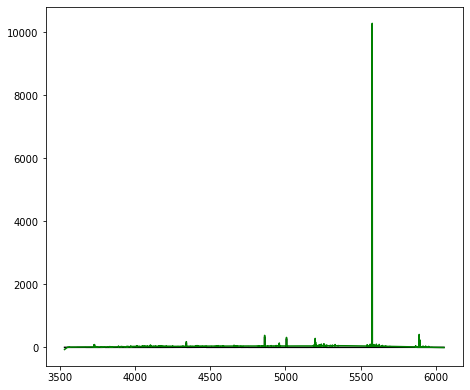

In [3]:
import matplotlib.pyplot as plt
import numpy as np
typ='blue'
base_name='reference'
base_name='LVM_example'
base_name='LVM_customneb2_example'
exptime='900'

input_file=base_name+'_'+typ+'_full_'+exptime+'_no_noise.fits'
dir_input='out_lvm_sim/'

hdr0=fits.getheader(dir_input+input_file, 0)
Target,hdr1=fits.getdata(dir_input+input_file, 1, header=True)
Total,hdr2=fits.getdata(dir_input+input_file, 2, header=True)
Err,hdr3=fits.getdata(dir_input+input_file, 3, header=True)
SNR,hdr4=fits.getdata(dir_input+input_file, 4, header=True)
Sky,hdr5=fits.getdata(dir_input+input_file, 5, header=True)
Wave,hdr6=fits.getdata(dir_input+input_file, 6, header=True)
hdu_list = fits.open(dir_input+input_file)
table_hdu = hdu_list[7]
table_data = table_hdu.data
header = table_hdu.header
fibid=table_data.field('id')
ring=table_data.field('ring')
position=table_data.field('position')
nx,ny=Target.shape
nxf,nyf=nx,ny
Total_F=np.copy(Total)
fibid_F=np.copy(fibid)

fig, ax = plt.subplots(figsize=(6.8*1.1,5.5*1.2))
plt.plot(Wave,Target[30,:],'-',color='black')
plt.plot(Wave,Total[30,:],'-',color='green')
#plt.plot(Wave,Err[30,:],'-',color='blue')
#plt.plot(Wave,SNR[30,:],'-',color='gray')
#plt.plot(Wave,Sky[30,:],'-',color='red')
plt.show()

<h1>Define Sky fibers</h1>

This part of the code extracts the Sky spectra for the sky fibers. <b>Temporary deactivated</b>, the LVM sim code will provide the Sky spectrum for the sky fibers


In [4]:
Sky=False
if Sky:
    exptime_sky='900'
    sky_nameA='LVM_skyA'
    sky_nameB='LVM_skyB'

    sky_fileA=sky_nameA+'_'+typ+'_full_'+exptime_sky+'_no_noise.fits'
    sky_fileB=sky_nameB+'_'+typ+'_full_'+exptime_sky+'_no_noise.fits'
    dir_cube='out_lvm_sim/'

    Total_SkyA,hdr2_skyA=fits.getdata(dir_cube+sky_fileA, 2, header=True)
    Wave_SkyA,hdr6_skyA=fits.getdata(dir_cube+sky_fileA, 6, header=True)
    hdu_skyA = fits.open(dir_cube+sky_fileA)
    table_hdu_skyA = hdu_skyA[7]
    table_data_skyA = table_hdu_skyA.data
    fibid_skyA=table_data_skyA.field('id')
    nx_sA,ny_sA=Total_SkyA.shape

    Total_SkyB,hdr2_skyB=fits.getdata(dir_cube+sky_fileB, 2, header=True)
    Wave_SkyB,hdr6_skyB=fits.getdata(dir_cube+sky_fileB, 6, header=True)
    hdu_skyB = fits.open(dir_cube+sky_fileB)
    table_hdu_skyB = hdu_skyB[7]
    table_data_skyB = table_hdu_skyB.data
    fibid_skyB=table_data_skyB.field('id')
    nx_sB,ny_sB=Total_SkyB.shape

    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(6.8*1.1,5.5*1.2))
    plt.plot(Wave_SkyA,Total_SkyA[30,:],'-',color='black')
    plt.plot(Wave_SkyB,Total_SkyB[30,:],'-',color='red')
    plt.show()

    from scipy.interpolate.interpolate import interp1d
    import numpy as np

    fibid_F=np.zeros(nx+nx_sA+nx_sB,dtype=int)
    Total_F=np.zeros([nx+nx_sA+nx_sB,ny])
    Total_F[0:nx,:]=Total
    fibid_F[0:nx]=fibid
    for i in range(0, nx_sA):
        Temp=interp1d(Wave_SkyA,Total_SkyA[i,:],bounds_error=False,fill_value=0)(Wave)
        Total_F[i+nx,:]=Temp
        fibid_F[i+nx]=i+nx+1
    for i in range(0, nx_sB):
        Temp=interp1d(Wave_SkyB,Total_SkyB[i,:],bounds_error=False,fill_value=0)(Wave)
        Total_F[i+nx+nx_sA,:]=Temp
        fibid_F[i+nx+nx_sA]=i+nx+nx_sA+1
    nxf,nyf=Total_F.shape    

<h1>Define flat spectra</h1>

This part of the code defines and extracts the Flat spectra for the Flat exposures. <b>Temporary deactivated</b>, the LVM sim code will provide the Flat spectrum.

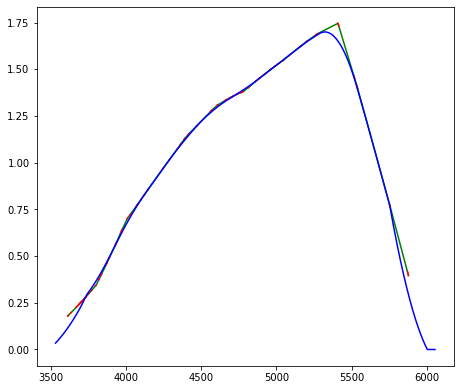

In [5]:
Flat=True
from scipy.interpolate.interpolate import interp1d
import numpy as np
if Flat:
    Target0,hdr1=fits.getdata(dir_input+input_file.replace('_no_noise','_input').replace('_'+exptime,''), 1, header=True)

    Rst=Target[30,:]/Target0[30,:]
    Rst=Rst/np.nanmean(Rst)
    nt=np.where(np.isfinite(Rst))
    Wave1=np.copy(Wave)
    Rst1=np.copy(Rst)
    Wave1=Wave1[nt]
    Rst1=Rst1[nt]
    RstN=interp1d(Wave1,Rst1,bounds_error=False,fill_value=0)(Wave) 

    ke=1000
    krn=ke/(Wave[1]-Wave[0])
    from scipy import signal
    ker=signal.gaussian(500, krn )
    ker=ker/np.sum(ker)
    RstM=np.convolve(RstN,ker,mode="same")

    fig, ax = plt.subplots(figsize=(6.8*1.1,5.5*1.2))
    plt.plot(Wave1,Rst1,'-',color='green')
    plt.plot(Wave,Rst,'-',color='red')
    plt.plot(Wave,RstM,'-',color='blue')
    plt.show()

    RstM=RstM*5000



<h1>Define the Arc exposures</h1>

This part of the code calculates and extracts the Arc lamp spectra for the Arc exposures. <b>Temporary deactivated</b>, the LVM sim code will provide the Arc lamp spectrum.

In [6]:
Arc=False
if Arc:
    arc_spec=twodlvm.ssp_extract_arc(Wave,dir_tem='libs/',col=typ)
    arc_spec=arc_spec*4
    fig, ax = plt.subplots(figsize=(6.8*1.1,5.5*1.2))
    #plt.plot(Wave1,Rst1,'-',color='green')
    plt.plot(Wave,arc_spec,'-',color='red')
    #plt.plot(Wave,RstM,'-',color='blue')
    plt.show()

<h1>Load the wavelength solution</h1>

This part of the code read the laboratory exposures to get a realistic wavelength maping to the detector pixels along its spectral dispersion axis.  It automatically selects the values of <b>expn</b> and <b> cam </b> as a function of the variable <b> typ </b> defined previuslly. Then, the script defines the laboratory exposure name, it looks at the default path <i> drp_input </i> for the file. Finally, the script reads the file and gets the average wavelength solution for all the fibers (<b> we will change this part in the future </b>) and interpolate this solution with the LVM sim oversampled wavelength values.

In [7]:
from scipy.interpolate.interpolate import interp1d
import numpy as np
if typ == 'blue':
    expn='00002998'
    cam='b1'
if typ == 'red':
    expn='00001563'
    cam='r1'
if typ == 'ir':
    expn='00001563'
    cam='z1'
    
cube_file='drp_input/'+typ+'-channel-data/sdR-s-'+cam+'-'+expn+'.disp.fits'
blue_s,hdrB=fits.getdata(cube_file, 0, header=True)
wave_s=np.nanmean(blue_s,axis=0)
nyt=len(wave_s)
pixel=np.arange(0,len(wave_s))
Pix=interp1d(wave_s,pixel,bounds_error=False,fill_value=-10)(Wave)    


<h1>Run the 2D projection module</h1>
<h2>The fiber trace</h2>

The input spectra (in counts given by LVM sim output) represent the total number of counts that should be observed within the whole 2-dimensional fiber trace $T_{2D}$ among the detector. This trace covers almost the whole wavelength dispersion axis ($y_pix$) and has a cross-sectional Gaussian profile that can be modeled as follows:

\begin{equation}
T_{2D,x_0,y_i}(x_{pix},y_{pix})=\frac{Counts(y_{pix}-y_i)}{2\pi \sigma_{x,0} \sigma_{y,i} \sqrt{1-\sigma_{x,y,0,i}^2}}\boldsymbol{\mathrm{e}}^{-\frac{1}{2(1-\sigma_{x,y,0,i}^2)}\left(\frac{(x_{pix}-x_0)^2}{\sigma_{x,0}^2}+\frac{(y_t-y_i)^2}{\sigma_{y,i}^2}-2\sigma_{x,y,0,i}\frac{y_{pix}-y_i}{\sigma_{y,i}}\frac{x_{pix}-x_0}{\sigma_{x,y,0,i}}\right)}
\end{equation}

\begin{equation}
T_{2D}(x_{pix},y_{pix})=\sum_{i=0}^{n_{ov}}T_{2D,x_0,y_i}
\end{equation}

The term $\sigma$ is the spectrograph 2D PSF that depends on the postion of the detector. This function is not in the final spectral sampling of the final mock data. The parameters $x_0$ and $y_0$ models the fiber flexures among the detector along the spatial axis ($x_{pix}$). In addition, $x_0$ contains information of the fiber trace separation among the CCD and therefore depends on the fiber trace number. The next step is to resample the $T_{2D}(x_{pix},y_{pix})$ to the actual spatial sampling on the y-axis of the detector. Finally, the 2D projection for all the 648 fibers per spectrograph is given by:
\begin{equation}
    M(x_{pix},y_{pix})=\sum_{i=0}^{648}T_{2D,resampl}(x_{pix},y_{pix},i)
\end{equation}

Then, by integrate all the 648 $T2D$ 2d arrays, the mock will naturally models the cross-talk effect on the 2D fiber traces. The matrix $M(x_{pix},y_{pix})$ represents the numerical value of one exposure from the LVM SDSS-V.

<h2>Bias read-noise and cosmic-rays</h2>

We add the bias $Bi_{j}$ and read-noise of the detector to $M(x_{pix},y_{pix})$ by modelling the read-noise as a random Gaussian distribution with dispersion $\sigma_{N}$. We also take into the CCD gain by divide the value of $M(x_{pix},y_{pix})$ by $gain_{j}$. The final value of the mock exposure is:

\begin{equation}
   M_{B}(x_{pix},y_{pix})=Rand(\sigma_{N})+Bi_{j}+M(x_{pix},y_{pix})/gain_{j}
\end{equation}
We take into account that the LVM CCDs are divided by quadrants and each of them has a different gain and bias value. Therefore, the values of $Bi_{j}$ and $gain_{j}$ are constant values within a given CCD quadrant represented by the index $j$. 

To simulate the cosmic-rays we define a cosmic-ray deep parameter $d_c$, that represent a hypothetical deep that a cosmic-ray would "penetrate" inside the CCD with an angle $\phi_c$ from the surface of the CCD to the cosmic-ray path. Therefore, the pixels that are "hited" by a cosmic ray are defined as: 

\begin{equation}
    x_{c}=i_{c}+x_{c,0}
\end{equation}
\begin{equation}
    y_{c}=i_{c}\tan(\theta_{c})+y_{c,0}
\end{equation}

The index $i_c$ runs from 0 to the integer of $l_c \cos \theta_{c}$ with $l_c=d_c/\tan \phi_{c}$. Theta is the angle from the $x_{pix}$ axis to the projected trace of the cosmic-ray on the CCD. The length of the projected trace is given by $l_a \cos \theta_{c}$. The initial position of the cosmic-ray trace $x_{c,0}$ and $y_{c,0}$ are random scattered across the area of $M_{B}(x_{pix},y_{pix})$. We generate a total number of cosmic-rays that depends on the type of exposure that we wan to simulate. We assigned a saturated value of $100,000$ counts for each pixel that was "hited" by the simulated cosmic-ray. Then, we convoluted all the 2D cosmic-ray traces by a Gaussian filter with dispersion $\sigma_{c}$ that equals to $0.5$ pixels. Finally we add the 2D cosmic-ray traces to the matrix $M_{B}(x_{pix},y_{pix})$.

Once that we have the final 2D simulated exposure, we set that all values within the exposure larger than $65,536$ (a 16 bit value) equals to $65,536$. This will simulate all the saturation reads on the CCD. And finally, we subtract a constant value of $32,768$ and convert all the float values to integer values, This final step convert the counts values to analog-to-digital units (ADUs) per pixel.

<h2>Input descriptions:</h2>

<b>spectra</b> -> 2D RSS taken from the LVM sim output

<b>fibid</b> -> Fiber boundle id number taken from the LVM sim output

<b>ring</b> -> Fiber boundle ring number taken from the LVM sim output

<b>position</b> -> Fiber boundle position id taken from the LVM sim output

<b>wave_s</b>-> Wavelength solution taken from the lab data.

<b>Wave</b>-> Wavelength sampling from the LVM sim output

<b>nfib</b>-> The number of fibers per detector. The deafult number is 648.

<b>typ</b>-> Type of the LVM output file: "blue", "red", "ir"

<b>cam</b>-> Spectrograph number

<b>n_cr</b>-> Number of cosmic rays

<b>expN</b>-> Exposure number for the output file.

<b>expt</b>-> Exposure time.

<b>ra,dec,mjd</b> -> RA, DEC and MJD of the simulated target

<b>field_name</b>-> Pointing name of the "observation"

<b>flb</b>-> Flavor of the exposure: Science ("s"), Arc ("a") or Flat ("f")

<b>base_name</b>-> Base name of the outpur file.

In [8]:
mjd=str(int(hdr0["MJD"]))
expt=hdr0["EXPTIME"]
ra=hdr0["RA"]
dec=hdr0["DEC"]
name=hdr0["TARGET"]
nfib=648
ntt=150
expN=23

spectra=np.zeros([nfib*3,ny])

nxt=nxf
flb='s'
n_cr=int(150*expt/900.0)
if Flat:
    nxt=nfib*3
    flb='f'
    n_cr=50
    Arc=False
if Arc:
    nxt=nfib*3
    flb='a'
    n_cr=30
    Flat=False

if Flat:
    for i in range(0, nxt):
        spectra[i,:]=RstM
elif Arc:
    for i in range(0, nxt):
        spectra[i,:]=arc_spec
else:
    spectra=Total_F

print(Total_F.shape)
print(spectra.shape)
print(np.nanmax(spectra))

fibid=table_data.field('id')
ring=table_data.field('ring')
position=table_data.field('position')

twodlvm.run_2d(spectra,fibid,ring,position,wave_s,Wave,nfib=nfib,type=typ,cam=1,n_cr=n_cr,expN=expN,expt=expt,ra=ra,dec=dec,mjd=mjd,field_name=name,flb=flb,base_name='sdR')
twodlvm.run_2d(spectra,fibid,ring,position,wave_s,Wave,nfib=nfib,type=typ,cam=2,n_cr=n_cr,expN=expN,expt=expt,ra=ra,dec=dec,mjd=mjd,field_name=name,flb=flb,base_name='sdR')
twodlvm.run_2d(spectra,fibid,ring,position,wave_s,Wave,nfib=nfib,type=typ,cam=3,n_cr=n_cr,expN=expN,expt=expt,ra=ra,dec=dec,mjd=mjd,field_name=name,flb=flb,base_name='sdR')

(1801, 5051)
(1944, 5051)
8499.149875360334
1 b1
Using PSF file
1 b2
Using PSF file
1 b3
Using PSF file
